In [1]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

     terms  %documents       idf
0      cat           5  4.321928
1      dog          20  2.321928
2  mammals           2  5.643856
3    mouse          10  3.321928
4      pet          60  0.736966

     terms  %documents       idf   tfQ      tfD1  tfD2  tfD3
0      cat           5  4.321928  0.25  0.166667  0.25  0.50
1      dog          20  2.321928  0.00  0.166667  0.25  0.25
2  mammals           2  5.643856  0.25  0.000000  0.25  0.00
3    mouse          10  3.321928  0.25  0.166667  0.25  0.25
4      pet          60  0.736966  0.25  0.500000  0.00  0.00

     terms  %documents       idf   tfQ      tfD1  tfD2  tfD3    tfidfQ  \
0      cat           5  4.321928  0.25  0.166667  0.25  0.50  1.080482   
1      dog          20  2.321928  0.00  0.166667  0.25  0.25  0.000000   
2  mammals           2  5.643856  0.25  0.000000  0.25  0.00  1.410964   
3    mouse          10  3.321928  0.25  0.166667  0.25  0.25  0.830482   
4      pet          60  0.736966  0.25  0.500000  0.00  0.00  0.

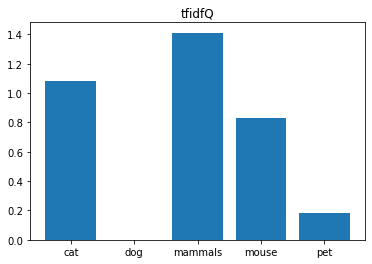

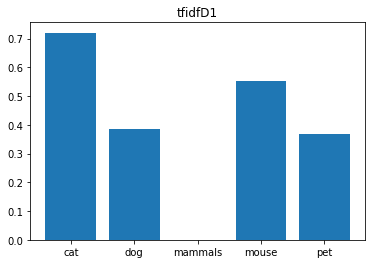

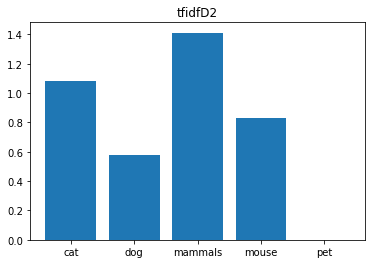

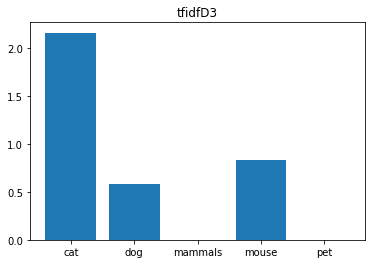


simQD1 =
0.6288846426378089
simQD2 =
0.9546948111493487
simQD3 =
0.6431937393302419

Relative ranking:
 1) Document 2: 0.95
 2) Document 3: 0.64
 3) Document 1: 0.63


In [3]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

data = pd.DataFrame()
terms = ['cat','dog','mammals','mouse','pet']
data['terms'] = terms
data['%documents'] = [5,20,2,10,60]

Q = ['mouse','cat','pet','mammals']

def words(D):
    return (re.sub("[^\w]", " ",  D).split())

def onlyTerms(D, terms): 
    return [w for w in D if w in terms] 

# write the first letter in lowercase
D1 = 'cat is a pet, dog is a pet, and mouse may be a pet too.'
D2 = 'cat, dog and mouse are all mammals.'
D3 = 'cat and dog get along well, but cat may eat a mouse.'

D1 = onlyTerms(words(D1),terms)
D2 = onlyTerms(words(D2),terms)
D3 = onlyTerms(words(D3),terms)

#a)
data['idf'] = np.log2(100/data['%documents'])
print(data)
print()

#b)
def tf(D):
    freq = dict(Counter(D))
    n = sum(freq.values())
    freq = {k: v/n for k, v in freq.items()}
    return freq

def allTerms(D,terms):
    vals = []
    for t in terms:
        if not t in D:
            D[t]=0
        vals.append(D[t])
    return vals

tfQ = tf(Q)
data['tfQ'] = allTerms(tfQ,terms)

tfD1 = tf(D1)
data['tfD1'] = allTerms(tfD1,terms)

tfD2 = tf(D2)
data['tfD2'] = allTerms(tfD2,terms)

tfD3 = tf(D3)
data['tfD3'] = allTerms(tfD3,terms)

print(data)
print()

#c)
data['tfidfQ'] = data['tfQ']*data['idf']
data['tfidfD1'] = data['tfD1']*data['idf']
data['tfidfD2'] = data['tfD2']*data['idf']
data['tfidfD3'] = data['tfD3']*data['idf']
print(data)
print()

def printPlot(terms,vals,title=''):
    plt.clf()
    plt.title(title)
    plt.bar(terms, vals)
    plt.show()

printPlot(terms,data['tfidfQ'],'tfidfQ')
printPlot(terms,data['tfidfD1'],'tfidfD1')
printPlot(terms,data['tfidfD2'],'tfidfD2')
printPlot(terms,data['tfidfD3'],'tfidfD3')
print()

#d)
def similarity(Q,D):
    numerator = np.dot(D,Q)
    denominator = (np.sqrt(sum(D**2)))*(np.sqrt(sum(Q**2)))
    return numerator/denominator

print('simQD1 =')
simQD1 = similarity(data['tfidfQ'],data['tfidfD1'])
print(simQD1)

print('simQD2 =')
simQD2 = similarity(data['tfidfQ'],data['tfidfD2'])
print(simQD2)

print('simQD3 =')
simQD3 = similarity(data['tfidfQ'],data['tfidfD3'])
print(simQD3)
print()

#e)
print('Relative ranking:')
print(' 1) Document 2: 0.95')
print(' 2) Document 3: 0.64')
print(' 3) Document 1: 0.63')

##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

Type your answer here:
$$precision = \frac{num\_correct}{num\_returned} = \frac{300}{300+50} = 0.857142857$$

$$recall = \frac{num\_correct}{total\_car} = \frac{300}{500} = 0.6$$

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
 1. The density changes across the images because we measure rapid local changes to find detections, so only detections that are above a global threshold will be detected. That's why in flat regions such as the sky or the shadow part of the building we obtain less detections than in the right part of the building that has much more corners and edges. That will be a problem for matching but can be avoided using some adaptive methods such as setting an adaptive threshold based on the information of its neighbors.

 2. Images with very few corners and edges can result in ambiguous orientation assignment.

Stage I.B (two questions)

 1. The descriptors are larger so that when locating feature points with detection we can obtain a more reliable estimation description.

 2. The change in lighting in the images may not be a problem since SIFT is robust to changes in ilumination, noise, and minor changes in viewpoint. To remove mismathces some algorithms such as k-d trees with best-bin-first search can be used.

Stage I.C (one question)

 1. Having $nnthreshold=0.8$ we obtain that 90% of the mismatches and less than 5% of the correct matches will be deleted. Some of the remaining mismatches can be deleted using disparity gradient and the RANSAC algorithm.


Part2 (one question)

 1. 


Part3:
Stage III.A (three questions)

 1. When the size of the vocabulary is highly decreased the number of inliners only suffer a small reduction, therefore the difficulty for computing the transformation is almost the same.

 2. This is done because the conversion of the descriptors into visual words can be pre-computed.

 3. We can obtain the following aproximated speedups:
  - 10 images: 0.18s
  - 100 images: 1.7s
  - 1000 images: 17s
  
  We can observe that the speedup is almost proporcional to the number of images. 


Stage III.B (one question)

 1. Because it is the same as the query image.

Stage III.C (two questions)

 1. Because now the score is the number of inlier words.

 2. Yes, we can see that the irrelevant images have lower score.